<a href="https://colab.research.google.com/github/ajramos202/customer-revenue-analysis/blob/main/Sales_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.0 MB/s eta 0:00:00


In [58]:
# Imports

from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating a pandas Dataframe using faker to fill in the information at random

fake = Faker()
data = {
    "Order_ID": [fake.uuid4() for _ in range(200)],
    "Customer": [fake.name() for _ in range(200)],
    "Product": [random.choice(["Laptop", "Phone", "Tablet", "Monitor", "Desktop"]) for _ in range(200)],
    "Quantity": [random.randint(1, 5) for _ in range(200)],
    "Price": [random.uniform(100, 1000) for _ in range(200)],
    "Discount_Applied": [round(random.uniform(0, 0.2), 2) for _ in range(200)],
    "Shipping_Address": [fake.address() for _ in range(200)],
    "Shipping_Cost": [random.uniform(10, 50) for _ in range(200)],
    "Total_Cost": [], # Will fill in below
    "Purchase_Date": [fake.date_this_decade() for _ in range(200)],
    "New_Customer": [random.choice([True, False]) for _ in range(200)],
    "Payment_Method": [random.choice(["Credit Card", "PayPal", "Cash on Delivery"]) for _ in range(200)],
    "Order_status": [random.choice(["Pending", "Processing", "Shipped", "Delivered", "Cancelled"]) for _ in range(200)],
    "Customer_Satisfaction": [random.choice(["Excellent", "Very Good", "Good", "Fair", "Poor"]) for _ in range(200)],

}
for i in range(200):
    data["Total_Cost"].append(round(
        data["Quantity"][i] * data["Price"][i] * (1 - data["Discount_Applied"][i]) + data["Shipping_Cost"][i], 2))
df = pd.DataFrame(data)
print(df.head())
print(df.info())

                               Order_ID           Customer  Product  Quantity  \
0  ab1d7359-6f30-4605-b7a1-f25255d75ca6    Taylor Anderson   Laptop         2   
1  3bfa07d4-e069-486f-93da-97883effa9e8     Jennifer Walsh  Desktop         4   
2  b37edce3-ffdd-47cd-8f8d-d3f3b23498be      Brian Andrews  Desktop         3   
3  cd66dcb2-59d8-4d8d-92b7-94f05022a20f  Michael Rodriguez   Tablet         1   
4  8686e11a-f925-404f-a782-4ac0d84dc4f3      Cameron Avila    Phone         1   

        Price  Discount_Applied  \
0  793.306075              0.12   
1  740.712389              0.17   
2  670.486084              0.09   
3  352.811890              0.05   
4  278.315169              0.12   

                                    Shipping_Address  Shipping_Cost  \
0  81168 Cook Squares Suite 989\nGreermouth, KS 0...      47.107841   
1  7025 Rice Harbor Apt. 394\nLake Dylanhaven, NV...      20.085824   
2  95206 Brown Branch Apt. 728\nJohnsonville, CA ...      28.860781   
3              341

In [4]:
df.columns

Index(['Order_ID', 'Customer', 'Product', 'Quantity', 'Price',
       'Discount_Applied', 'Shipping_Address', 'Shipping_Cost', 'Total_Cost',
       'Purchase_Date', 'New_Customer', 'Payment_Method', 'Order_status',
       'Customer_Satisfaction'],
      dtype='object')

In [5]:
df['Product'].unique()

array(['Desktop', 'Monitor', 'Laptop', 'Tablet', 'Phone'], dtype=object)

In [6]:
# Were there more new or returning customers?
df["New_Customer"] = df["New_Customer"].replace({True: "Yes", False: "No"})
new_customer_percentages = df["New_Customer"].value_counts(normalize=True) * 100
formatted_output = "\n".join([f"{index}: {value:.2f}%" for index, value in new_customer_percentages.items()])
print(f"New Customer:\n{formatted_output}")


New Customer:
Yes: 51.00%
No: 49.00%


In [11]:
# On average how much did each customer spend?
average_spent = df['Total_Cost'].mean()
print(f'On average, each customer spent ${round(average_spent, 2)}')

On average, each customer spent $1507.38


In [8]:
# What payment method was used the most?
payment_counts = df["Payment_Method"].value_counts()
for type, count in payment_counts.items():
  print(f'{count} customers chose to use {type} as their payment method.')

69 customers chose to use Credit Card as their payment method.
69 customers chose to use PayPal as their payment method.
62 customers chose to use Cash on Delivery as their payment method.


In [14]:
# What product was bought the most frequently?
product_frequency = df['Product'].value_counts(normalize=True)*100
print('Within this sample of customer sales:\n')
for item, count in product_frequency.items():
  print(f'{count:.2f}% of customers bought a {item}.')

Within this sample of customer sales:

29.00% of customers bought a Monitor.
19.00% of customers bought a Laptop.
18.00% of customers bought a Tablet.
17.00% of customers bought a Desktop.
17.00% of customers bought a Phone.


In [36]:
avg_satisfaction_rating = round(df['Customer_Satisfaction'].map({'Excellent': 5, 'Very Good': 4, 'Good': 3, 'Fair': 2, 'Poor': 1}).mean())
print(f'The average satisfaction rating is {avg_satisfaction_rating} out of 5')

The average satisfaction rating is 3 out of 5


In [47]:
# On average, who spent more per order: new customers or returning?

df["New_Customer"] = df["New_Customer"].replace({True: "New Customer", False: "Returning Customer"})
round(df.groupby("Customer")["Total_Cost"].mean())

,Total_Cost
Customer,
Aaron Dalton,1358.0
Adam Sawyer,539.0
Aimee Lane,1476.0
Alexis Davis,3054.0
Alicia Ross,660.0
...,...
Vincent Johnson,472.0
Wendy Nelson,2846.0
William Benson,318.0


<ipython-input-48-7d8ed9eebaa8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")


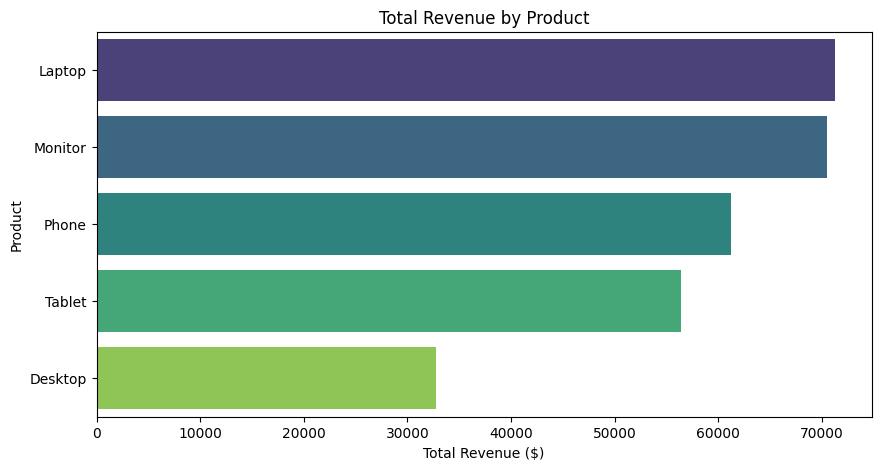

In [48]:
# Which products generated the highest revenue?

# Group the products to compare with the average total cost
product_sales = df.groupby("Product")["Total_Cost"].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=product_sales.values, y=product_sales.index, palette="viridis")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product")
plt.title("Total Revenue by Product")
plt.show()


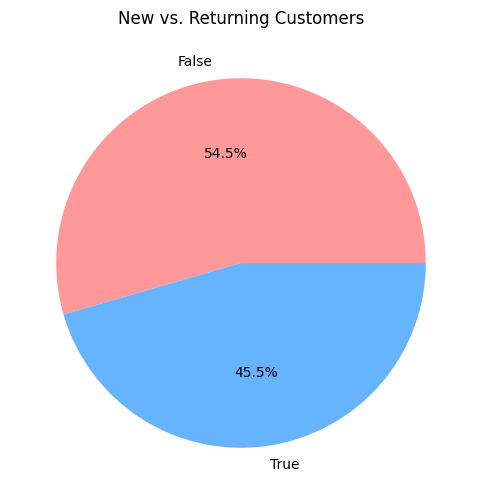

In [61]:
# How many customers were new versus returning?

# Count occurrences
customer_counts = df["New_Customer"].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(customer_counts, labels=customer_counts.index, autopct="%1.1f%%", colors=["#FF9999", "#66B3FF"])
plt.title("New vs. Returning Customers")
plt.show()


<ipython-input-60-858d48ca5759>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Discount_Applied"]*100, y=df["Total_Cost"], palette="coolwarm")


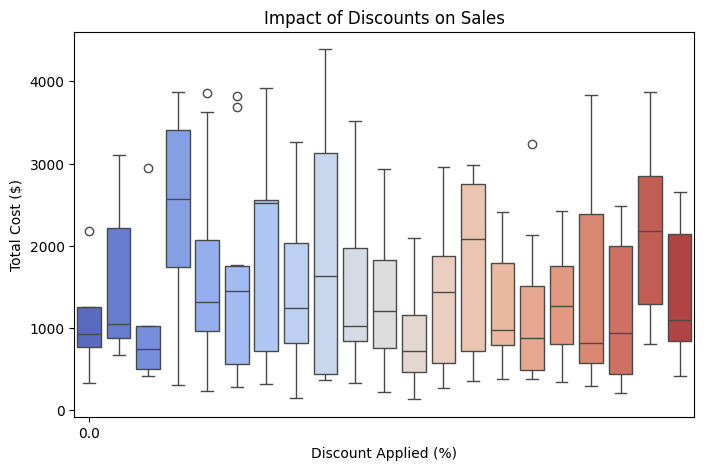

In [60]:
# Was there an impact on sales when the customer used a higher vs lower discount?

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Discount_Applied"]*100, y=df["Total_Cost"], palette="coolwarm")
plt.xlabel("Discount Applied (%)")
plt.ylabel("Total Cost ($)")
plt.title("Impact of Discounts on Sales")
# Reduce number of x-ticks
plt.xticks(np.arange(0, df["Discount_Applied"].max() + 1, step=5))  # Show every 5% increment
plt.show()